# Cápitulo 1: Importando Dados e Primeiras Visualizações

### 1.1: Importando Dados

In [1]:
import pandas as pd

# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

df_raw = pd.read_csv("npl_silenthill_raw.csv")

In [2]:
df_raw

,Unnamed: 0,Comentario
0,0,"3izzy215Jun 22, 2024Felt like I wasted a few h..."
1,1,"1SamaelsBookFeb 8, 2024As boring as i can imag..."
2,2,"3chupumcuFeb 2, 2024It has nothing to do with ..."
3,3,"9TastyMilk4RealMay 28, 2024short message from ..."
4,4,"9OmnipotensApr 26, 2024I think it was a good g..."
...,...,...
353,353,"5HashtagJugandoFeb 1, 2024Lo bueno, que es gra..."
354,354,"8Textoraxel37Feb 1, 2024A new start for Silent..."
355,355,"10Galaz9103Feb 1, 2024This Game was amazing, T..."
356,356,"3yoman696Feb 1, 2024The game was basically a w..."


### 1.2: Tipos de Dados

In [3]:
df_raw.dtypes

Unnamed: 0     int64
Comentario    object
dtype: object

# Cápitulo 2: Processamento de Dados

In [4]:
df_clean = df_raw.copy()

# Remover duplicatas mantendo apenas uma ocorrência
df_clean = df_raw.drop_duplicates(subset='Comentario')

# Mostrar DataFrame sem duplicatas
print("DataFrame sem duplicatas:")
df_clean

DataFrame sem duplicatas:


,Unnamed: 0,Comentario
0,0,"3izzy215Jun 22, 2024Felt like I wasted a few h..."
1,1,"1SamaelsBookFeb 8, 2024As boring as i can imag..."
2,2,"3chupumcuFeb 2, 2024It has nothing to do with ..."
3,3,"9TastyMilk4RealMay 28, 2024short message from ..."
4,4,"9OmnipotensApr 26, 2024I think it was a good g..."
...,...,...
353,353,"5HashtagJugandoFeb 1, 2024Lo bueno, que es gra..."
354,354,"8Textoraxel37Feb 1, 2024A new start for Silent..."
355,355,"10Galaz9103Feb 1, 2024This Game was amazing, T..."
356,356,"3yoman696Feb 1, 2024The game was basically a w..."


### 2.1: Limpar Comentários

In [5]:
import re

# Função para limpar o comentário
def limpar_comentario(comentario):
    # Extrai o nome do usuário corretamente, excluindo meses
    nome_usuario_match = re.match(r'^\d*(\D+)', comentario)
    nome_usuario = nome_usuario_match.group(1).strip() if nome_usuario_match else ''

    # Remove os meses do nome do usuário
    nome_usuario = re.split(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)', nome_usuario)[0].strip()

    # Extrai a data corretamente
    data_match = re.search(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}, \d{4}', comentario)
    data = data_match.group(0) if data_match else 'Jan 1, 1900'  # Valor padrão caso a data não seja encontrada

    # Converte a data para datetime
    data_datetime = pd.to_datetime(data)

    # Extrai o comentário limpo
    comentario_limpo = re.sub(r'^\d*\D+\w+ \d{1,2}, \d{4}', '', comentario).strip()

    # Remove 'Read More' se existir
    comentario_limpo = comentario_limpo.replace('Read More', '')

    # Remove espaços extras no início e no fim do comentário
    comentario_limpo = comentario_limpo.strip()

    return nome_usuario, data_datetime, comentario_limpo

In [6]:
# Aplica a função ao DataFrame
df_clean[['Nome', 'Data', 'Comentario']] = df_clean['Comentario'].apply(lambda x: pd.Series(limpar_comentario(x)))
df_clean['Comentario_Limpo'] = df_clean['Comentario']
df_clean

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,Felt like I wasted a few hrs of my life playin...,izzy,2024-06-22,Felt like I wasted a few hrs of my life playin...
1,1,As boring as i can imagine. It is not Silent H...,SamaelsBook,2024-02-08,As boring as i can imagine. It is not Silent H...
2,2,It has nothing to do with the town or the fran...,chupumcu,2024-02-02,It has nothing to do with the town or the fran...
3,3,short message from Silent Hill is definitely a...,TastyMilk,2024-05-28,short message from Silent Hill is definitely a...
4,4,I think it was a good game but as a silent hil...,Omnipotens,2024-04-26,I think it was a good game but as a silent hil...
...,...,...,...,...,...
353,353,"Lo bueno, que es gratuito.\nEl juego se me hiz...",HashtagJugando,2024-02-01,"Lo bueno, que es gratuito.\nEl juego se me hiz..."
354,354,A new start for Silent Hill. Finally a good ga...,Textoraxel,2024-02-01,A new start for Silent Hill. Finally a good ga...
355,355,"This Game was amazing, The only negative thing...",Galaz,2024-02-01,"This Game was amazing, The only negative thing..."
356,356,The game was basically a walking simulator wit...,yoman,2024-02-01,The game was basically a walking simulator wit...


### 2.2: Traduzir Comentários

In [7]:
from googletrans import Translator
from langdetect import detect

# Instantiate translator
translator = Translator()

# List to store original and translated comments
translated_comments = []

# Function to detect language and translate to English
def traduzir_para_ingles(comentario, index):
    try:
        if detect(comentario) != 'en':
            translated_text = translator.translate(comentario, src=detect(comentario), dest='en').text
            translated_comments.append({'Index': index, 'Original': comentario, 'Translated': translated_text})
            return translated_text
        return comentario
    except:
        return comentario

In [8]:
# Apply the translation function to the 'Comentário' column safely using .loc
df_clean.loc[:, 'Comentario_Limpo'] = df_clean.apply(lambda row: traduzir_para_ingles(row['Comentario_Limpo'], row.name), axis=1)

# Create a DataFrame with the original and translated comments
df_translated = pd.DataFrame(translated_comments)

df_translated.head(10)

,Index,Original,Translated
0,7,O shadow drop do State of Play e o meu primeir...,The State of Play shadow drop and my first Sil...
1,23,Caballeros el Team qué hizo Silent hill no vol...,Knights El Team What Silent Hill did not retur...
2,24,"Muy buena historia, en los momentos que tienes...","Very good story, at the moments that you have ..."
3,32,O jogo todo é bem mediano. A história é fraca ...,The whole game is very median.The story is wea...
4,35,Traz um terror contemporâneo e trilha sonora i...,It brings a contemporary terror and impeccal s...
5,38,اللعبة جدا والدقة جدا رهيبة لكن القصة عادية ح...,"The game is very very terrible, but the story ..."
6,42,si esto es con lo que piensan revivir silent h...,"If this is what they think Silent Hill, I am n..."
7,45,Me ha gustado la puesta en escena aunque es co...,"I liked the staging although it is short, I un..."
8,48,"Maltratam os jogadores com jogos grátis, se fa...","Mistreat players with free games, if they do s..."
9,53,Storia bella però le ambientazioni sono un po’...,"Bella story, however, the settings are a bit s..."


### 2.3: Tratamentos Finais

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from autocorrect import Speller

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
spell = Speller(lang='en')

# Define text preprocessing function
def preprocess_and_correct_text(text)
    # Remove pontuação e números
    text = re.sub(r'[\d{}]+'.format(re.escape(string.punctuation)), '', text)
    # Tokenização
    words = word_tokenize(text)
    # Remover stop words, lematizar e corrigir ortografia
    processed_words = [spell(lemmatizer.lemmatize(word.lower())) for word in words if word.lower() not in stop_words]
    # Juntar as palavras em uma string única e normalizar espaços em branco
    cleaned_text = ' '.join(processed_words).strip()
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df_clean['Comentario_Limpo'] = df_clean['Comentario_Limpo'].apply(preprocess_and_correct_text)
df_clean

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,Felt like I wasted a few hrs of my life playin...,izzy,2024-06-22,felt like wasted hr life playing hope ’ direct...
1,1,As boring as i can imagine. It is not Silent H...,SamaelsBook,2024-02-08,boring imagine silent hill moderntwitter game ...
2,2,It has nothing to do with the town or the fran...,chupumcu,2024-02-02,nothing town franchise message
3,3,short message from Silent Hill is definitely a...,TastyMilk,2024-05-28,short message silent hill definitely good way ...
4,4,I think it was a good game but as a silent hil...,Omnipotens,2024-04-26,think good game silent hill game part doesnt f...
...,...,...,...,...,...
353,353,"Lo bueno, que es gratuito.\nEl juego se me hiz...",HashtagJugando,2024-02-01,good free game long time could sympathize prot...
354,354,A new start for Silent Hill. Finally a good ga...,Textoraxel,2024-02-01,new start silent hill finally good game franch...
355,355,"This Game was amazing, The only negative thing...",Galaz,2024-02-01,game amazing negative thing think chase first ...
356,356,The game was basically a walking simulator wit...,yoman,2024-02-01,game basically walking simulator random runnin...


# Cápitulo 3: Análise de Sentimentos

### 3.1: Vader

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positivo'
    elif score['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

In [12]:
# Aplicar a função à coluna 'Comentário' e armazenar o resultado em uma nova coluna 'Sentimento'
df_clean['Sentimento'] = df_clean['Comentario_Limpo'].apply(analyze_sentiment_vader)

### 3.2: Análise de Resultados

In [13]:
# Filtrar linhas onde 'Sentimento' é 'positivo'
comentarios_positivos = df_clean[df_clean['Sentimento'] == 'positivo']

comentarios_positivos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
0,0,Felt like I wasted a few hrs of my life playin...,izzy,2024-06-22,felt like wasted hr life playing hope ’ direct...,positivo
3,3,short message from Silent Hill is definitely a...,TastyMilk,2024-05-28,short message silent hill definitely good way ...,positivo
4,4,I think it was a good game but as a silent hil...,Omnipotens,2024-04-26,think good game silent hill game part doesnt f...,positivo
6,6,Well that’s two hours of my life I won’t get b...,nickjkirby,2024-03-20,well ’ two hour life ’ get back shotgun want b...,positivo
8,8,Overall a decent game with a decent story abou...,MechanixX,2024-03-18,overall decent game decent story social medium...,positivo
10,10,This is literally the worst game I have ever p...,Romaoplays,2024-03-03,literally worst game ever played actually laug...,positivo
12,12,[SPOILER ALERT: This review contains spoilers.],BlimpyPebbles,2024-03-01,spoiler alert review contains spoiler,positivo
14,14,[SPOILER ALERT: This review contains spoilers.],TheCarelessGame,2024-02-29,spoiler alert review contains spoiler,positivo
15,15,"Beside having a great atmosphere, and being fr...",Lorenzoo,2024-02-26,beside great atmosphere free game absolutely u...,positivo
16,16,Silent Hill: The Short Message is no where nea...,DarkwingSchmuck,2024-02-24,silent hill short message near insult silent h...,positivo


In [14]:
# Filtrar linhas onde 'Sentimento' é 'negativo'
comentarios_negativos = df_clean[df_clean['Sentimento'] == 'negativo']

comentarios_negativos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
1,1,As boring as i can imagine. It is not Silent H...,SamaelsBook,2024-02-08,boring imagine silent hill moderntwitter game ...,negativo
5,5,(MY SCORE : 6 /10) Survival-Horror game from t...,ArdhazzGamer,2024-03-24,score survivalhorror game silent hill series s...,negativo
7,7,O shadow drop do State of Play e o meu primeir...,bfsm,2024-03-19,state play shadow drop first silent hill franc...,negativo
9,9,Absolute disgraceful addition to the Silent Hi...,Bladerunner_NZ,2024-03-05,absolute disgraceful addition silent hill fran...,negativo
11,11,An abysmal experience that won't take your mon...,TrueOptimist,2024-03-01,absmag experience wont take money indeed waste...,negativo
13,13,Nice freebie by Konami. The story is interesti...,RedDragon,2024-02-29,nice freeze kami story interesting suicide dep...,negativo
18,18,Silent Hill: The **** Message is a strong cont...,GamergodsFail,2024-02-18,silent hill message strong contender worst gam...,negativo
20,20,With little scares and not much that made me t...,Ishotrubberduck,2024-02-16,little scare much made think “ silent hill ” s...,negativo
21,21,"Has quite a good atmosphere in some places, co...",Ldt,2024-02-16,quite good atmosphere place completely wrecked...,negativo
24,24,"Muy buena historia, en los momentos que tienes...",Mulder,2024-02-13,good story moment become desperate hand genera...,negativo


In [15]:
# Filtrar linhas onde 'Sentimento' é 'neutro'
comentarios_neutros = df_clean[df_clean['Sentimento'] == 'neutro']

comentarios_neutros.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
2,2,It has nothing to do with the town or the fran...,chupumcu,2024-02-02,nothing town franchise message,neutro
102,102,This game has a gameplay that looks like from ...,dragonfirees,2024-02-03,game gameplay look like finally say kami dead ...,neutro
121,121,"This is a very simple, 2-hours free-to-play vi...",andreasbenakis,2024-02-03,simple hour freetoplay videogame shouldnt call...,neutro
139,139,"Um simulador de caminhada, tendo uma duração i...",Stivali,2024-02-03,walk simulator duration le two hour,neutro
140,140,"Silent Hill is back, lot of comments are from ...",FOX,2024-02-03,silent hill back lot comment people doesnt get...,neutro
302,302,This. ****.Silent.Hill.\nIs. ****.Silent.Hill....,cocukyiyorum,2024-02-02,silenthill silenthill silenthill silent silent...,neutro
311,311,Let's start with the good (there isn't a lot):...,Peanuts_dx,2024-02-02,let start good isnt lot game doesnt bug pretty...,neutro
340,340,"Juegazo, porfin silent hill regresa a lo psico...",OthoGx,2024-02-02,game portion silent hill return psychological ...,neutro
346,346,An excellent interpretation of the SH1 in a mo...,LogosRiding,2024-02-01,excellent interpretation sh modern way say sh ...,neutro


# Cápitulo 4: Análise Visual

### 4.1: Distribuição de Sentimentos

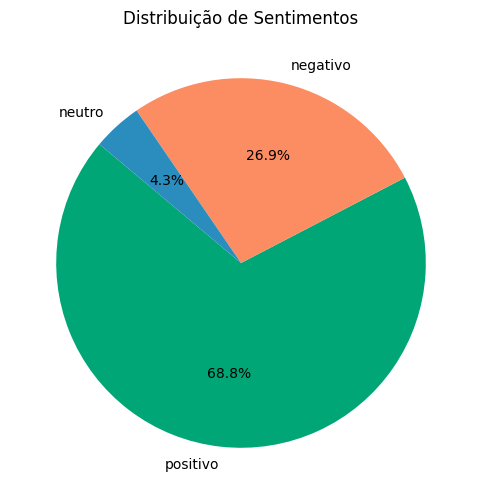

In [16]:
import matplotlib.pyplot as plt

# Conta a quantidade de cada valor na coluna 'Sentimento'
contagem_sentimentos = df_clean['Sentimento'].value_counts()

# Prepara os dados para o gráfico de pizza
labels = contagem_sentimentos.index
sizes = contagem_sentimentos.values

# Cores correspondentes aos sentimentos
cores = {
    'positivo': '#00a676',  # Verde mais escuro
    'neutro': '#2b8cbe',    # Azul mais escuro
    'negativo': '#fc8d62'   # Vermelho mais escuro
}

# Cria o gráfico de pizza
plt.figure(figsize=(8, 6))  # Tamanho da figura (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[cores[label] for label in labels])

# Adiciona título
plt.title('Distribuição de Sentimentos')

# Mostra o gráfico
plt.show()

### 4.2: Análise Temporal de Comentários

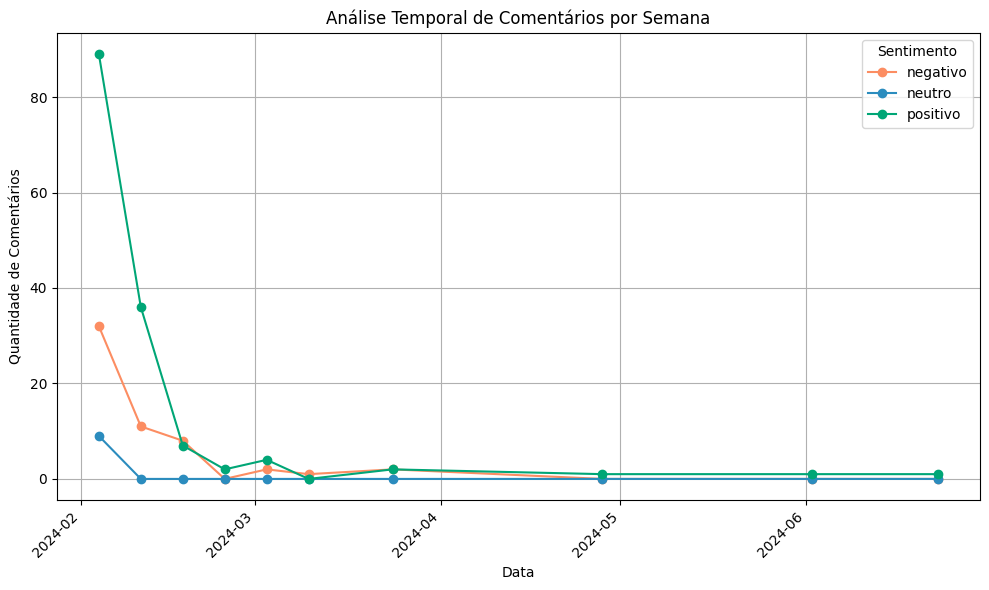

In [17]:
# Agrupar por semana e sentimento
comentarios_por_semana = df_clean.groupby([pd.Grouper(key='Data', freq='W'), 'Sentimento']).size().unstack(fill_value=0)

# Plotar o gráfico de linha com cores personalizadas
ax = comentarios_por_semana.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6), color=[cores.get(x, '#333333') for x in comentarios_por_semana.columns])
plt.xlabel('Data')
plt.ylabel('Quantidade de Comentários')
plt.title('Análise Temporal de Comentários por Semana')
plt.legend(title='Sentimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [18]:
# df_clean.to_csv("npl_silenthill_clean.csv")